In [2]:
pip install lightgbm

     ---------------------------------------- 1.4/1.4 MB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

In [7]:
df_train = pd.read_csv("C:\\Users\\Nancy\\Downloads\\01_SC4000_OpenInAnacomda\\train_data_FINAL.csv")
df_train.head()

,card_id,feature_1,feature_2,feature_3,target,year,month,active_days,purchase_year_mean,purchase_year_max,...,avg_purchases_lag12_std,avg_purchases_lag12_min,avg_purchases_lag12_max,active_months_lag12_mean,active_months_lag12_std,active_months_lag12_min,active_months_lag12_max,category_4_nunique,period_to_first_transaction_max,period_to_first_transaction_min
0,C_ID_92a2005557,5,2,1,-0.820283,2017,6,245,2017.251701,2018,...,100.681589,0.252963,554.39780,11.775510,1.040451,5.0,12.0,0,10.906702,0.854139
1,C_ID_3d0044924f,4,1,0,0.392913,2017,1,396,2017.167116,2018,...,40.625282,0.209035,554.39780,11.862534,0.788411,7.0,12.0,0,14.881735,0.164258
2,C_ID_d639edf6cd,2,2,0,0.688056,2016,8,549,2017.088889,2018,...,2.262005,0.752641,16.21978,11.844444,0.796457,7.0,12.0,0,20.860710,5.354796
3,C_ID_186d6a6901,4,3,0,0.142495,2017,9,153,2017.343750,2018,...,4.461818,0.436002,16.21978,11.395833,1.538825,7.0,12.0,0,7.522996,0.821288
4,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017,11,92,2017.692737,2018,...,41.493053,0.286437,554.39780,11.659218,1.254682,5.0,12.0,0,5.847569,0.361367


In [8]:
df_train.shape

(201917, 116)

In [9]:
df_test = pd.read_csv("C:\\Users\\Nancy\\Downloads\\01_SC4000_OpenInAnacomda\\test_data_FINAL.csv")
df_test.head()

,card_id,feature_1,feature_2,feature_3,year,month,active_days,purchase_year_mean,purchase_year_max,purchase_year_min,...,avg_purchases_lag12_std,avg_purchases_lag12_min,avg_purchases_lag12_max,active_months_lag12_mean,active_months_lag12_std,active_months_lag12_min,active_months_lag12_max,category_4_nunique,period_to_first_transaction_max,period_to_first_transaction_min
0,C_ID_0ab67a22ab,3,3,1,2017,4,306,2017.040541,2018,2017,...,3.100074,0.584000,16.219780,11.797298,0.992847,7.0,12.0,0,10.939553,0.098555
1,C_ID_130fd0cbdd,2,3,0,2017,1,396,2017.136364,2018,2017,...,1.655720,0.710589,16.219780,11.897727,0.678737,7.0,12.0,0,15.571616,0.394218
2,C_ID_b709037bc5,5,1,1,2017,8,184,2017.466667,2018,2017,...,0.266840,0.584000,1.452443,12.000000,0.000000,12.0,12.0,0,7.358739,0.788436
3,C_ID_d27d835a9f,2,1,0,2017,12,62,2017.583333,2018,2017,...,0.136471,0.584000,1.327300,12.000000,0.000000,12.0,12.0,0,4.500657,0.098555
4,C_ID_2b5e3df5c2,5,1,1,2015,12,793,2017.302521,2018,2017,...,9.309529,0.540334,95.666664,11.647058,1.239110,7.0,12.0,0,28.350854,13.107753


In [10]:
df_test.shape

(123623, 115)

In [11]:
for column in df_train.columns:
    print(column, df_train[column].dtype)

card_id object
feature_1 int64
feature_2 int64
feature_3 int64
target float64
year int64
month int64
active_days int64
purchase_year_mean float64
purchase_year_max int64
purchase_year_min int64
purchase_year_std float64
purchase_year_nunique int64
purchase_month_mean float64
purchase_month_max int64
purchase_month_min int64
purchase_month_std float64
purchase_month_nunique int64
weekofyear_mean float64
weekofyear_max int64
weekofyear_min int64
weekofyear_nunique int64
dayofweek_mean float64
weekend_sum int64
weekend_mean float64
hour_mean float64
hour_max int64
hour_min int64
authorized_flag_sum int64
authorized_flag_mean float64
authorized_flag_nunique int64
card_id_size int64
city_id_nunique int64
category_1_sum int64
category_1_mean float64
category_1_nunique int64
installments_sum float64
installments_mean float64
installments_max float64
installments_min float64
installments_std float64
installments_nunique int64
merchant_category_id_nunique int64
merchant_id_nunique int64
month_l

In [13]:
print(df_train.columns)
print(df_test.columns)


Index(['card_id', 'feature_1', 'feature_2', 'feature_3', 'target', 'year',
       'month', 'active_days', 'purchase_year_mean', 'purchase_year_max',
       ...
       'avg_purchases_lag12_std', 'avg_purchases_lag12_min',
       'avg_purchases_lag12_max', 'active_months_lag12_mean',
       'active_months_lag12_std', 'active_months_lag12_min',
       'active_months_lag12_max', 'category_4_nunique',
       'period_to_first_transaction_max', 'period_to_first_transaction_min'],
      dtype='object', length=116)
Index(['card_id', 'feature_1', 'feature_2', 'feature_3', 'year', 'month',
       'active_days', 'purchase_year_mean', 'purchase_year_max',
       'purchase_year_min',
       ...
       'avg_purchases_lag12_std', 'avg_purchases_lag12_min',
       'avg_purchases_lag12_max', 'active_months_lag12_mean',
       'active_months_lag12_std', 'active_months_lag12_min',
       'active_months_lag12_max', 'category_4_nunique',
       'period_to_first_transaction_max', 'period_to_first_transaction

In [14]:
categorical_columns = [
    'feature_1', 'feature_2', 'feature_3', 
    'most_recent_sales_range_get_mode', 'most_recent_purchases_range_get_mode'
]
for col in categorical_columns:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')

count_columns = [
    'purchase_year_nunique', 'purchase_month_nunique', 'weekofyear_nunique', 
    'authorized_flag_nunique', 'card_id_size', 'city_id_nunique', 
    'state_id_nunique', 'subsector_id_nunique', 'merchant_group_id_nunique', 
    'merchant_category_id_nunique', 'merchant_id_nunique', 'category_4_nunique', 
    'installments_nunique'
]
for col in count_columns:
    df_train[col] = df_train[col].astype('int64')
    df_test[col] = df_test[col].astype('int64')

카피

In [15]:
params = {'boosting': 'gbdt',
          'objective':'regression',
          'metric': 'rmse',
          'learning_rate': 0.01, # 0.003! #0.005 #0.006 
          'num_leaves': 110, #110 #100 #150 large, but over-fitting
          'max_bin': 66,  #60 #50 # large,but slower,over-fitting
          'max_depth': 10, # deal with over-fitting
          'min_data_in_leaf': 30, # deal with over-fitting
          'min_child_samples': 20,
          'feature_fraction': 0.5,#0.5 #0.6 #0.8
          'bagging_fraction': 0.8,
          'bagging_freq': 40,#5  
          'bagging_seed': 11,
          'lambda_l1': 2,#1.3! #5 #1.2 #1
          'lambda_l2': 0.1, #0.1
          'verbose': 2
         }


In [16]:
target = df_train['target']
train = df_train.drop(['card_id', 'target'], axis=1) 
test = df_test.drop('card_id', axis=1)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

In [21]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

# Optimized parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'max_bin': 255,  # Adjusted for memory efficiency
    'num_leaves': 31,  # Lowered for memory efficiency
    'bagging_fraction': 0.8,  # Use only 80% of the data for each boosting round
    'feature_fraction': 0.8,  # Consider only 80% of features
    'learning_rate': 0.05,
    'random_state': 11
}

# Data type conversion for memory efficiency
train = train.astype('float32')
test = test.astype('float32')

# Reducing the dataset size (downsampling) if needed
# train_reduced = train.sample(n=50000, random_state=11)  # Uncomment to downsample

# Reduce feature space by dropping irrelevant columns (if applicable)
# train = train.drop(columns=['feature_1', 'feature_2', 'feature_3'])  # Example drop columns

nfolds = 5
nrepeats = 2
folds = RepeatedKFold(n_splits=nfolds, n_repeats=nrepeats, random_state=11)
fold_pred = np.zeros(len(train))
feature_importance_df = pd.DataFrame()
lgb_preds = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print(f"fold n°{fold_}")
    
    # Prepare data for training and validation
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx], label=target.iloc[val_idx])
    
    # Reduced number of iterations for early stopping
    iteration = 1000  # Reduced from 2000 to save memory
    lgb_m = lgb.train(
        params, 
        trn_data, 
        iteration, 
        valid_sets=[trn_data, val_data], 
        callbacks=[lgb.early_stopping(stopping_rounds=100)]
    )
    
    fold_pred[val_idx] = lgb_m.predict(train.iloc[val_idx], num_iteration=lgb_m.best_iteration)
    
    # Feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = train.columns
    fold_importance_df["importance"] = lgb_m.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    # Averaging the predictions across folds
    lgb_preds += lgb_m.predict(test, num_iteration=lgb_m.best_iteration) / (nfolds * nrepeats)

# Print cross-validation score
cv_score = np.sqrt(mean_squared_error(fold_pred, target))
print(f"CV score: {cv_score:<8.5f}")


fold n°0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18593
[LightGBM] [Info] Number of data points in the train set: 161533, number of used features: 110
[LightGBM] [Info] Start training from score -0.387723
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[242]	training's rmse: 3.3654	valid_1's rmse: 3.76123
fold n°1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18606
[LightGBM] [Info] Number of data points in the train set: 161533, number of used features: 110
[LightGBM] [Info] Start training from score -0.394163
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[355]	training's rmse: 3.29543	valid_1's r

In [22]:
# ranking all feature by avg importance score from Kfold, select top100
all_features = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)
all_features.reset_index(inplace=True)
important_features = list(all_features[0:100]['feature'])
all_features[0:100]

,feature,importance
0,month_lag_mean,371.0
1,purchase_year_mean,250.8
2,authorized_flag_mean,229.3
3,month_lag_std,215.2
4,month_lag_max,208.7
...,...,...
95,active_months_lag12_min,11.1
96,year,7.9
97,purchase_year_max,6.4
98,most_recent_purchases_range_nunique,5.0


In [23]:
# Check feature correlation 
# important_features = list(final_importance['feature'][0:60])
df = train[important_features]
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
high_cor = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(high_cor))
print(high_cor)

25
['weekofyear_mean', 'active_days', 'purchase_amount_mean', 'purchase_amount_sum', 'purchase_amount_std', 'card_id_size', 'avg_sales_lag6_min', 'purchase_month_nunique', 'merchant_id_nunique', 'avg_purchases_lag3_mean', 'numerical_2_mean', 'avg_purchases_lag3_std', 'avg_sales_lag6_mean', 'avg_purchases_lag6_mean', 'avg_purchases_lag12_mean', 'numerical_2_std', 'avg_sales_lag6_std', 'avg_purchases_lag6_std', 'avg_purchases_lag12_std', 'numerical_2_max', 'avg_purchases_lag3_max', 'avg_sales_lag6_max', 'avg_purchases_lag6_max', 'purchase_month_min', 'avg_purchases_lag12_max']


In [24]:
# final selected features: drop highly correlated features from important features.
features = [i for i in important_features if i not in high_cor]
print(len(features))
print(features)

75
['month_lag_mean', 'purchase_year_mean', 'authorized_flag_mean', 'month_lag_std', 'month_lag_max', 'category_1_sum', 'purchase_month_std', 'purchase_month_mean', 'hour_mean', 'period_to_first_transaction_max', 'category_1_mean', 'purchase_amount_min', 'purchase_amount_max', 'weekofyear_nunique', 'month_lag_min', 'period_to_first_transaction_min', 'dayofweek_mean', 'installments_sum', 'weekend_mean', 'purchase_year_std', 'avg_purchases_lag3_min', 'category_3_B_mean', 'weekofyear_max', 'avg_sales_lag3_min', 'installments_std', 'avg_sales_lag12_min', 'month_lag_nunique', 'month', 'weekofyear_min', 'authorized_flag_sum', 'category_3_C_mean', 'avg_purchases_lag6_min', 'weekend_sum', 'installments_mean', 'numerical_1_mean', 'merchant_group_id_nunique', 'numerical_1_max', 'merchant_category_id_nunique', 'avg_sales_lag3_mean', 'category_2_1.0_mean', 'avg_purchases_lag12_min', 'numerical_1_std', 'active_months_lag12_std', 'active_months_lag12_mean', 'avg_sales_lag12_mean', 'subsector_id_nuni

2nd round

In [25]:
# params for 2nd round training
params = {'boosting': 'gbdt',
          'objective':'regression',
          'metric': 'rmse',
          'learning_rate': 0.003, # 0.003! #0.005 #0.006 
          'num_leaves': 110, #110 #100 #150 large, but over-fitting
          'max_bin': 66,  #60 #50 # large,but slower,over-fitting
          'max_depth': 10, # deal with over-fitting
          'min_data_in_leaf': 30, # deal with over-fitting
          'min_child_samples': 20,
          'feature_fraction': 0.8,#0.5 #0.6 #0.8
          'bagging_fraction': 0.8,
          'bagging_freq': 40,#5  
          'bagging_seed': 11,
          'lambda_l1': 2,#1.3! #5 #1.2 #1
          'lambda_l2': 0.1, #0.1
          'verbose': 2
         }

In [26]:
train = train[features]
test = test[features]

In [ ]:
# Hyperparameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'max_bin': 255,
    'num_leaves': 16,  # Reduced number of leaves for faster computation
    'learning_rate': 0.05,  # You can adjust this based on the results
    'bagging_fraction': 0.8,  # For faster training
    'feature_fraction': 0.8,  # For faster training
    'random_state': 11,
    'num_threads': -1  # Use all available CPU threads
}

# KFold cross-validation
nfolds = 5
nrepeats = 2
folds = RepeatedKFold(n_splits=nfolds, n_repeats=nrepeats, random_state=11)
fold_pred = np.zeros(len(train))
lgb_preds = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

# Train the model using cross-validation
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print(f"fold n°{fold_}")
    
    # Prepare the datasets for LightGBM
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=target.iloc[trn_idx])  # You can specify categorical features here
    val_data = lgb.Dataset(train.iloc[val_idx], label=target.iloc[val_idx])  # You can specify categorical features here
    
    # Train the model with early stopping
    iteration = 500  # Start with a smaller number of iterations
    lgb_model = lgb.train(
        params,
        trn_data,
        iteration,
        valid_sets=[trn_data, val_data],
        callbacks=[lgb.early_stopping(stopping_rounds=50)]  # Stop earlier if there's no improvement
    )
    
    # Store the predictions for the validation set
    fold_pred[val_idx] = lgb_model.predict(train.iloc[val_idx], num_iteration=lgb_model.best_iteration)
    
    # Feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = train.columns
    fold_importance_df["importance"] = lgb_model.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    # Make predictions on the test set
    lgb_preds += lgb_model.predict(test, num_iteration=lgb_model.best_iteration) / (nfolds * nrepeats)

# Calculate the Cross-Validation RMSE score
cv_score = np.sqrt(mean_squared_error(fold_pred, target))
print(f"CV score: {cv_score:<8.5f}")


In [28]:
# training data label 
target.describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219280
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965069
Name: target, dtype: float64

In [29]:
# predicted values
pd.DataFrame(lgb_preds).describe()

,0
count,123623.000000
mean,-0.394842
std,0.980401
min,-17.605080
25%,-0.421594
50%,-0.218142
75%,-0.096595
max,2.719538


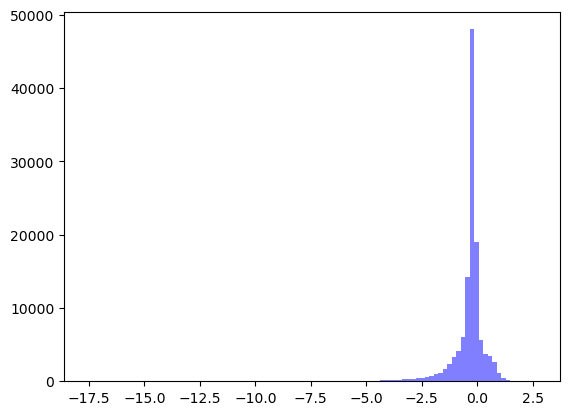

In [30]:
num_bins = 100
n, bins, patches = plt.hist(lgb_preds, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [31]:
# for submition
submition_final = pd.DataFrame({"card_id":df_test["card_id"].values})
# Add target value to submition_final file
submition_final["target"] = lgb_preds
submition_final.to_csv("submition_final.csv", index=False)

In [32]:
# feature importance
final_importance = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)
final_importance.reset_index(inplace=True)
final_importance[0:50]

,feature,importance
0,month_lag_mean,9883.9
1,authorized_flag_mean,6502.1
2,category_1_sum,6378.5
3,purchase_year_mean,6179.0
4,month_lag_max,5554.9
5,month_lag_std,5412.1
6,purchase_month_mean,5264.4
7,purchase_amount_max,4650.3
8,period_to_first_transaction_min,4479.8
9,hour_mean,4423.1


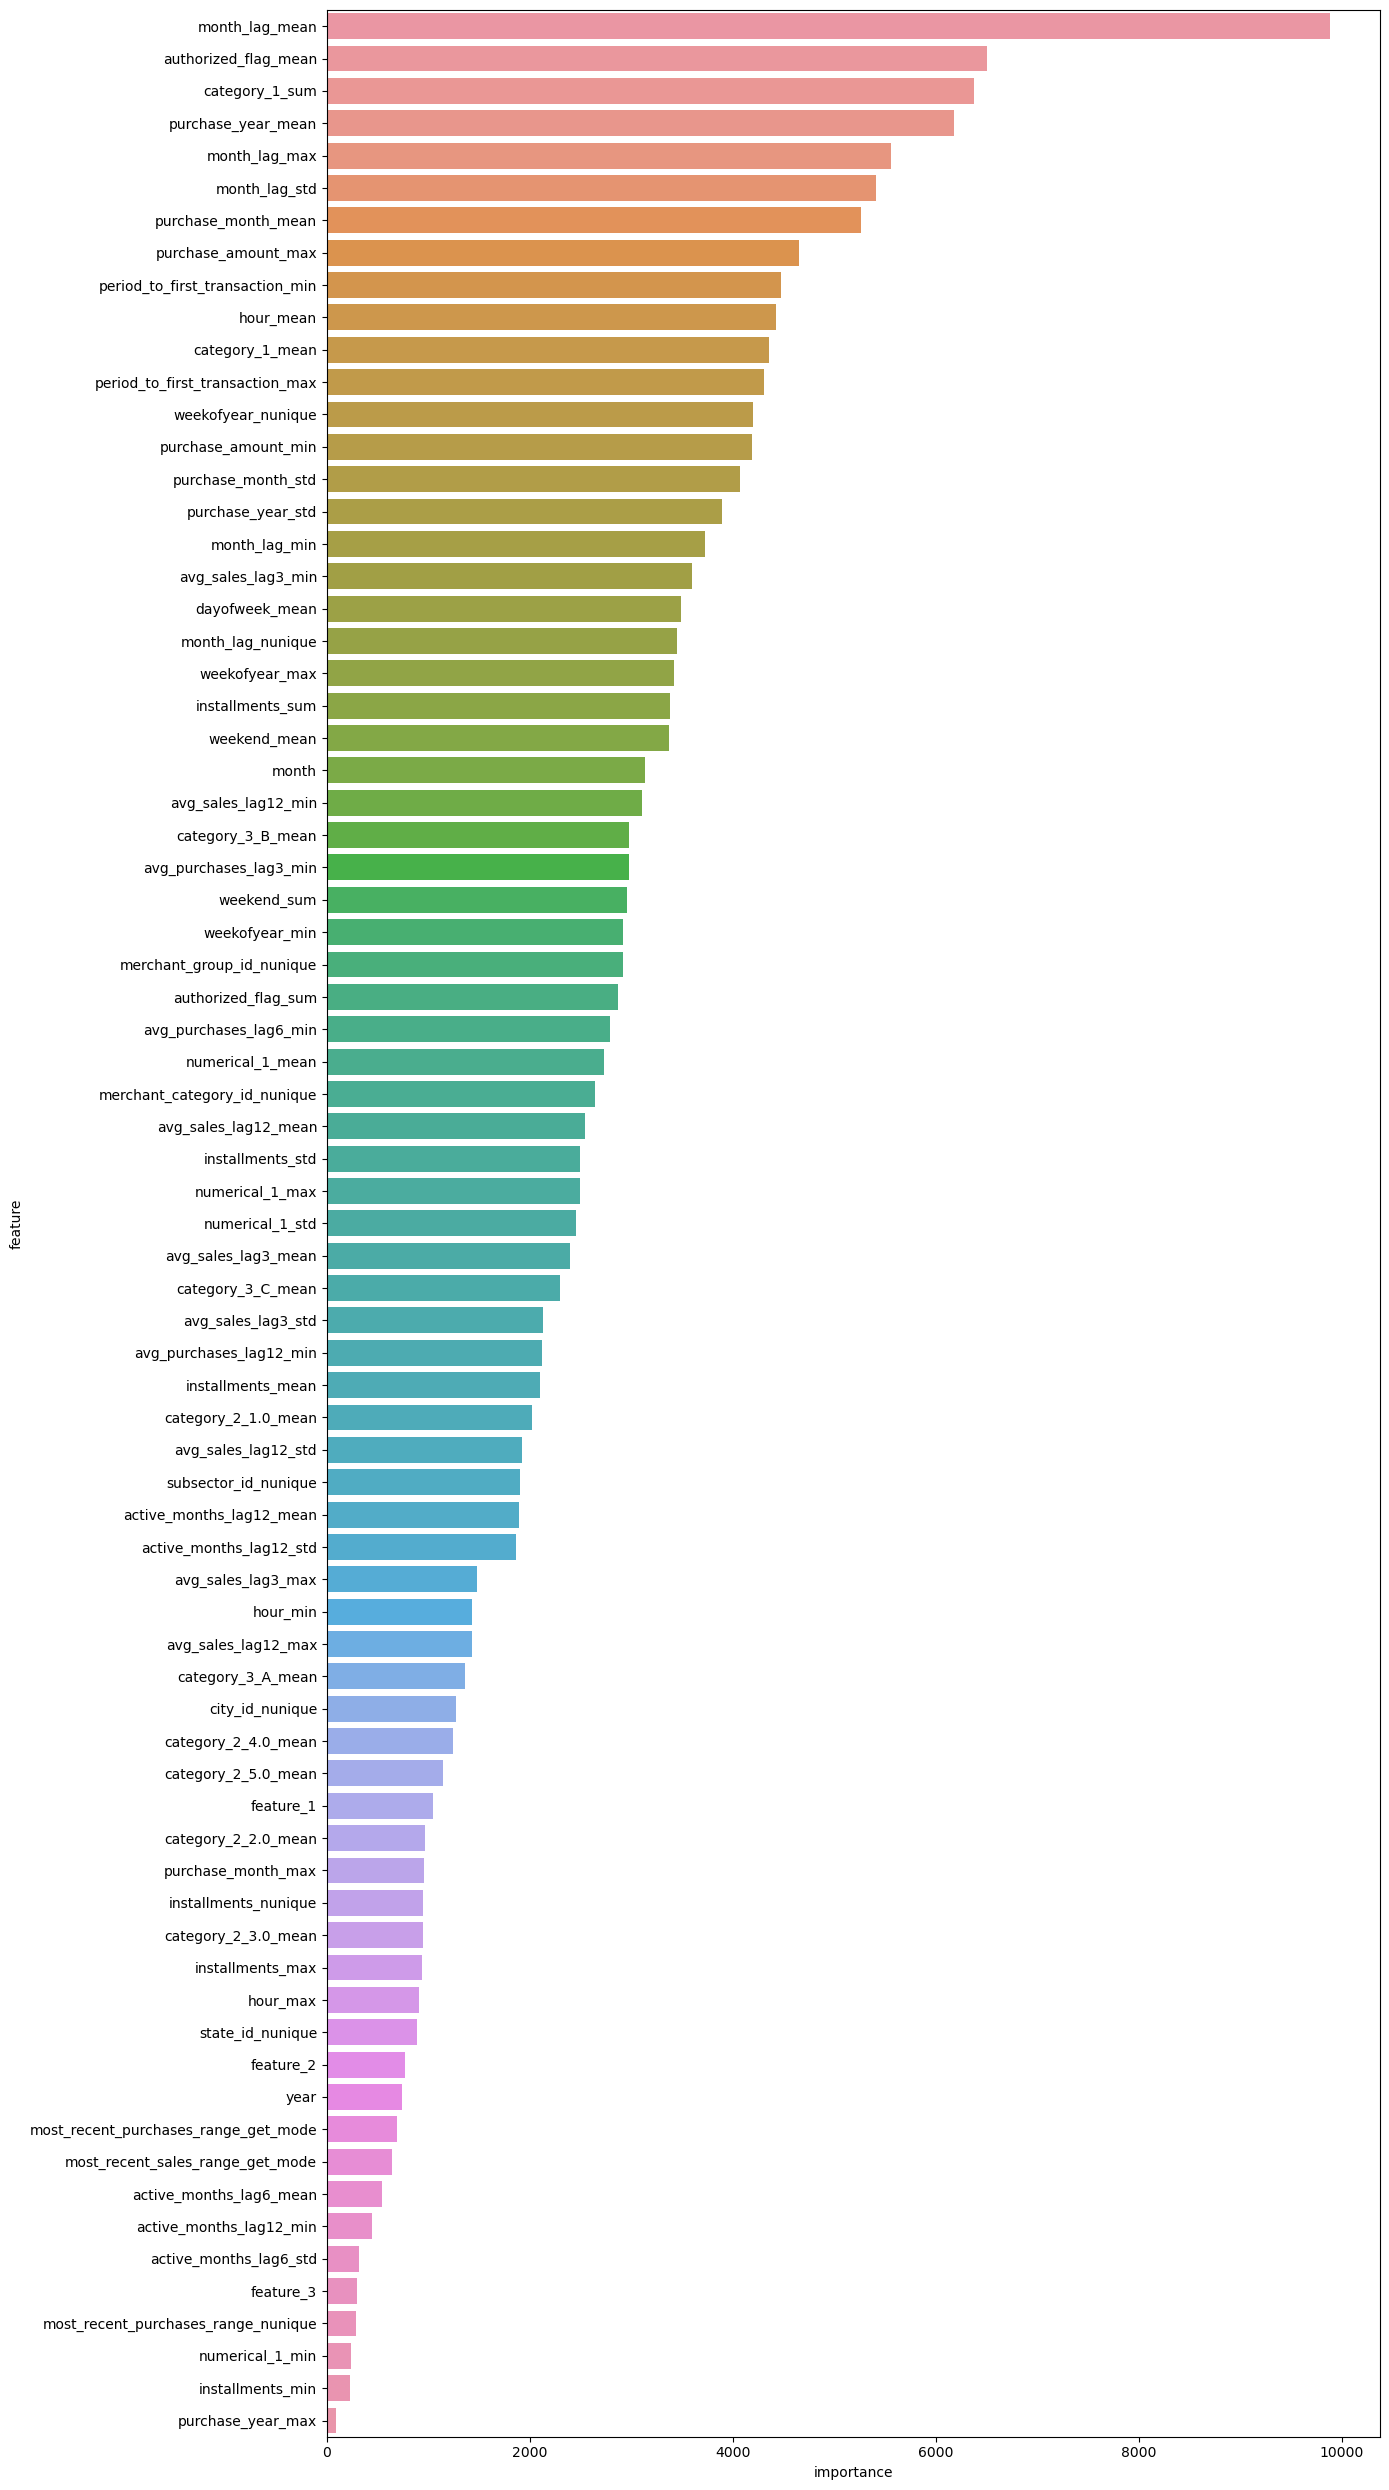

In [33]:
plt.figure(figsize=(14,25))
sns.barplot(x="importance",y="feature",data=final_importance)
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Select top N features (e.g., top 20) based on LGBM feature importance
top_features = final_importance['feature'][:20].tolist()  # Select top 20 features

# Split the data into training and testing sets
X = df_train[top_features]
y = df_train['target']  # Replace 'target' with your actual target column name

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor with chosen parameters
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_valid)

# Calculate the RMSE for the model
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validation RMSE:", rmse)

# If test predictions are needed:
# X_test = test_merge[top_features]
# y_test_pred = rf_model.predict(X_test)


Validation RMSE: 3.772283557332132
